VISUALIZATIONS USING PYSPARK

In [20]:
# Import Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [21]:
# Store filepaths into variable
diabetes_data_csv = Path("resources/diabetes_data_updated.csv")

# Read in files and make dfs
diabetes_data_df = pd.read_csv(diabetes_data_csv)

In [22]:
#display dfs
display(diabetes_data_df)

,Diabetes_binary,Age,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Education,Income,Unique_ID
0,0.0,7,1,0.0,1,33.0,0.0,0.0,0.0,1,...,1,0.0,2.0,15.0,0.0,1.0,1,6.0,9.0,18861
1,0.0,7,0,1.0,1,27.0,1.0,0.0,0.0,1,...,1,0.0,2.0,1.0,2.0,0.0,1,6.0,6.0,20160
2,0.0,13,0,1.0,1,26.0,1.0,0.0,0.0,0,...,1,0.0,3.0,0.0,30.0,0.0,1,4.0,3.0,22983
3,0.0,11,0,0.0,1,19.0,1.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,0,5.0,7.0,19244
4,0.0,5,1,0.0,1,37.0,0.0,0.0,0.0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,5.0,3.0,29881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67131,1.0,11,1,0.0,1,27.0,0.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,5.0,6.0,48734
67132,1.0,11,1,1.0,1,26.0,0.0,0.0,0.0,0,...,1,0.0,4.0,0.0,0.0,0.0,0,4.0,2.0,49124
67133,1.0,8,1,1.0,1,32.0,0.0,0.0,1.0,1,...,1,1.0,2.0,10.0,0.0,0.0,1,6.0,6.0,34310
67134,1.0,10,1,1.0,1,33.0,0.0,0.0,0.0,0,...,1,0.0,2.0,0.0,0.0,1.0,1,4.0,5.0,3209


In [23]:
# Determine the number of unique values in each column.
diabetes_data_df.nunique() #VERIFY binary values

Diabetes_binary             2
Age                        13
HighBP                      2
HighChol                    2
CholCheck                   2
BMI                        79
Smoker                      2
Stroke                      2
HeartDiseaseorAttack        2
PhysActivity                2
Fruits                      2
Veggies                     2
HvyAlcoholConsump           2
AnyHealthcare               2
NoDocbcCost                 2
GenHlth                     5
MentHlth                   31
PhysHlth                   31
DiffWalk                    2
Sex                         2
Education                   6
Income                     11
Unique_ID               67136
dtype: int64

In [29]:
# Import necessary PySpark libraries
from pyspark.sql import SparkSession

# Initialize Spark session with increased timeout for Python workers
spark = SparkSession.builder \
    .appName("PieChartExample") \
    .config("spark.executor.heartbeatInterval", "200s") \
    .config("spark.network.timeout", "600s") \
    .getOrCreate()

In [31]:
# check pyspark applications
spark.stop()
spark = SparkSession.builder.appName("YourAppName").getOrCreate()

In [32]:
spark = SparkSession.builder.master("local[*]").appName("YourAppName").getOrCreate()

In [36]:
from pyspark.sql import SparkSession

# Stop the existing Spark session if any
try:
    spark.stop()
except:
    pass

# Increase network timeout and heartbeat interval
spark = SparkSession.builder \
    .appName("DiabetesAnalysis") \
    .config("spark.network.timeout", "10000s") \
    .config("spark.executor.heartbeatInterval", "60s") \
    .getOrCreate()

# Verify the configuration
for item in spark.sparkContext.getConf().getAll():
    print(item)

# Check the type of the DataFrame to ensure it's a PySpark DataFrame
print(type(diabetes_data_df))

# Group the data by 'Sex' and 'Diabetes_binary' and count occurrences
grouped_data = diabetes_data_df.groupBy('Sex', 'Diabetes_binary').count()

# Show the grouped data
grouped_data.show()


('spark.app.name', 'DiabetesAnalysis')
('spark.driver.extraJavaOptions', '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false')
('spark.executor.heartbeatInterval', '60s')
('spark.driver.host', 'm

AttributeError: 'DataFrame' object has no attribute 'groupBy'

In [34]:
from pyspark.sql import SparkSession

# Increase network timeout and heartbeat interval
spark = SparkSession.builder \
    .appName("DiabetesAnalysis") \
    .config("spark.network.timeout", "10000s") \
    .config("spark.executor.heartbeatInterval", "60s") \
    .getOrCreate()

# Group the data by 'Sex' and 'Diabetes_binary' and count occurrences
grouped_data = diabetes_data_df.groupBy('Sex', 'Diabetes_binary').count()

# Show the grouped data
grouped_data.show()

AttributeError: 'DataFrame' object has no attribute 'groupBy'

In [30]:
# Group by 'Sex' and 'Diabetes_binary' and count occurrences
grouped_data = df_spark.groupBy('Sex', 'Diabetes_binary').count()

# Show the grouped data
grouped_data.show()

Py4JJavaError: An error occurred while calling o68.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 10 in stage 1.0 failed 1 times, most recent failure: Lost task 10.0 in stage 1.0 (TID 22) (mias.lan executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1570)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:695)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:660)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:636)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:582)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:541)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 34 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1570)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:695)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:660)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:636)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:582)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:541)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 34 more


In [ ]:
# Convert grouped data to Pandas DataFrame
grouped_data_pd = grouped_data.toPandas()

# Separate the data for plotting
male_data = grouped_data_pd[grouped_data_pd['Sex'] == 1]['count'].values
female_data = grouped_data_pd[grouped_data_pd['Sex'] == 0]['count'].values

# Define labels
labels = ['Non-Diabetic', 'Diabetic']

# Plot pie chart for males
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(male_data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes Distribution Among Males')

# Plot pie chart for females
plt.subplot(1, 2, 2)
plt.pie(female_data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Diabetes Distribution Among Females')

plt.show()


In [ ]:
# Convert grouped data to Pandas DataFrame
grouped_data_pd = grouped_data.toPandas()

Text(0.5, 1.0, 'DISTRIBUTION OF SEX')

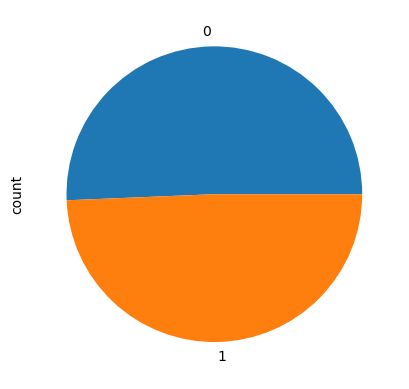

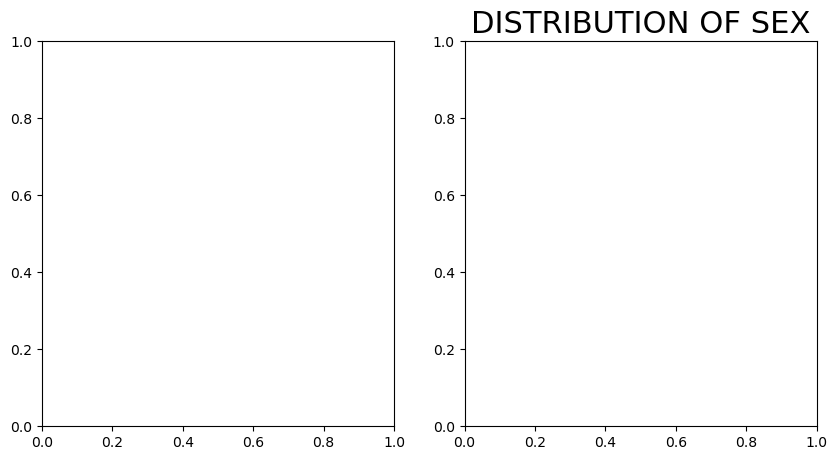

In [18]:
# determine relationship between sex and diabetics
from matplotlib.pyplot import pie, axis, show
diabetes_data_df["Sex"].value_counts().plot.pie() #first, visualize distribution of sex across all data
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
fig, (ax1) = plt.subplots(ncols=2, figsize=(10, 5))
plt.title('DISTRIBUTION OF SEX', size=22)
# if pie chart distribution is relatively equal, data is balanced in terms of sex